<center> <h1> Сборный проект 1 </h1> </center>
    

### Описание данных
- *Name* — название игры
- *Platform* — платформа
- *Year_of_Release* — год выпуска
- *Genre* — жанр игры
- *NA_sales —* продажи в Северной Америке (миллионы долларов)
- *EU_sales* — продажи в Европе (миллионы долларов)
- *JP_sales* — продажи в Японии (миллионы долларов)
- *Other_sales —* продажи в других странах (миллионы долларов)
- *Critic_Score* — оценка критиков (максимум 100)
- *User_Score* — оценка пользователей (максимум 10)
- *Rating* — рейтинг от организации *ESRB*.

In [2]:
import pandas as pd, matplotlib.pyplot as plt, numpy as np, math as mt, seaborn as sns, datetime
from scipy import stats as st
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv('/datasets/games.csv')

## Шаг 1. Изучение общей информации

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Посмотрим какова доля пропущенных значений в каждом столбце

In [7]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending = False)

,column_name,percent_missing
Critic_Score,Critic_Score,51.319174
Rating,Rating,40.478612
User_Score,User_Score,40.089740
Year_of_Release,Year_of_Release,1.609333
Name,Name,0.011965
Genre,Genre,0.011965
Platform,Platform,0.000000
NA_sales,NA_sales,0.000000
EU_sales,EU_sales,0.000000
JP_sales,JP_sales,0.000000


Столбцы с рейтингом и оценками пользователей "лидируют" по числу пропусков. Посмотрим как менялась ситуация в зависимости от года.

In [8]:
pd.DataFrame(df.groupby('Year_of_Release')['Critic_Score', 'User_Score','Rating'].agg('count'))

,Critic_Score,User_Score,Rating
Year_of_Release,,,
1980.0,0,0,0
1981.0,0,0,0
1982.0,0,0,0
1983.0,0,0,0
1984.0,0,0,0
1985.0,1,1,1
1986.0,0,0,0
1987.0,0,0,0
1988.0,1,1,1


Первая строка без пропусков в столбцах с рейтингами соответствует 1985 году, далее встречаются единичные строки в 1988, 1992 и 1994 годах.
Посмотрим количество игр выпущенных в эти годы.

In [9]:
print(df.query('Year_of_Release == 1985')['Name'].count(),
df.query('Year_of_Release == 1988')['Name'].count(),
df.query('Year_of_Release == 1992')['Name'].count(),
df.query('Year_of_Release == 1994')['Name'].count())

14 15 43 121


Всё-таки игр выпускалось по нескольку штук, причём количество росло. Выводы ниже.

## Вывод
1. Данные содержат пропуски в следующих столбцах:



<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><b style='mso-bidi-font-weight:normal'>Столбец<o:p></o:p></b></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'><b style='mso-bidi-font-weight:normal'>Кол-во
  пропусков<o:p></o:p></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>Name</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>2</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>Year_of_Release</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>269</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>Genre</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>2</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>Critic_Score</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>8578</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>User_Score</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>6701</p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6;mso-yfti-lastrow:yes'>
  <td width=196 valign=top style='width:113.1pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal style='margin-bottom:0cm;margin-bottom:.0001pt;line-height:
  normal'><span class=SpellE>Rating</span></p>
  </td>
  <td width=185 valign=top style='width:106.35pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormal align=center style='margin-bottom:0cm;margin-bottom:.0001pt;
  text-align:center;line-height:normal'>6766</p>
  </td>
 </tr>
</table>
 Наибольшее кол-во пропусков содержат столбцы с оценками (Critic_Score, User_Score и Rating) и характерно это для старых игр. Видимо на заре зарождения индустрии компьютерных игр было сложно получить отзывы и оценки от пользователей, либо эти данные утеряны в силу давности. Более или менее, эти данные стали доступны с 1996 г. Это необходимо учесть при анализе.
 
 2. Необходимо изменение типа данных в столбце User_Score
 
 

## Шаг 2. Предобработка данных

Приведём названия столбцов к нижнему регистру.

In [10]:
df.columns = df.columns.str.lower()

Измененим тип данных в столбце user_score.

Учтём, что в описании проекта указано: "*Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать*"

In [11]:
len(df.query('user_score == "tbd"'))

2424

In [12]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.6       2
2.3       2
0.9       2
9.7       1
0         1
Name: user_score, Length: 96, dtype: int64

2424 строки с 'tbd' в столбце user_score.

На ресурсе Википедия доступна следующая информация:
*TBD is an abbreviation often meaning in ordinary writing "to be discussed" "to be done", "to be defined", "to be decided"* (https://en.wikipedia.org/wiki/TBD_(disambiguation)).


То есть данная английская аббревиатура означает некую неопределённость, незавершённость и тп.
Так, например, на сайте www.metacritic.com  лишь три пользователя поставили свои оценки игре Zumba Fitness 2 и User Score, при этом отмечен как tbd с комментарием *No user score yet Awaiting 1 more rating* То есть необходимо, чтобы минимум 4 пользователя поставили свою оценку.

Получается, что tbd это по сути отсутствие оценки, поэтому справедливо заменить эти значения на NaN и после этого поменять тип данных.

In [13]:
df.loc[df['user_score'] == 'tbd', 'user_score']= np.nan

In [14]:
df['user_score'] = df['user_score'].astype('float')

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [15]:
df['global_sales'] = df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

Займёмся пропусками в genre

In [16]:
df[df['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


По сути только одна "зацепка" это продажи в Северной Америке 1,78 млн долларов.

Взглянем на игры 1993 года у конкурирующей платформы.

In [17]:
df.loc[(df['platform'] == 'SNES') & (df['year_of_release'] == 1993)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
56,Super Mario All-Stars,SNES,1993.0,Platform,5.99,2.15,2.12,0.29,NaN,NaN,NaN,10.55
476,Star Fox,SNES,1993.0,Shooter,1.61,0.51,0.80,0.07,NaN,NaN,NaN,2.99
852,Super Street Fighter II,SNES,1993.0,Fighting,0.52,0.16,1.29,0.03,NaN,NaN,NaN,2.00
892,Mortal Kombat II,SNES,1993.0,Fighting,1.48,0.39,0.00,0.06,NaN,NaN,NaN,1.93
953,Secret of Mana,SNES,1993.0,Role-Playing,0.25,0.07,1.49,0.02,NaN,NaN,NaN,1.83
1009,Disney's Aladdin,SNES,1993.0,Platform,0.94,0.34,0.21,0.27,NaN,NaN,NaN,1.76
1053,Super Puyo Puyo,SNES,1993.0,Puzzle,0.00,0.00,1.69,0.01,NaN,NaN,NaN,1.70
1319,Dragon Ball Z,SNES,1993.0,Fighting,0.00,0.00,1.45,0.00,NaN,NaN,NaN,1.45
1683,Dragon Ball Z: La Legende Saien,SNES,1993.0,Fighting,0.00,0.00,1.20,0.00,NaN,NaN,NaN,1.20
1727,Romancing SaGa 2,SNES,1993.0,Role-Playing,0.00,0.00,1.17,0.00,NaN,NaN,NaN,1.17


In [18]:
df['name'][659] = 'Mortal Kombat II'
df['genre'][659] = 'Fighting'

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df[df['name']== 'Mortal Kombat II']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
659,Mortal Kombat II,GEN,1993.0,Fighting,1.78,0.53,0.0,0.08,NaN,NaN,NaN,2.39
892,Mortal Kombat II,SNES,1993.0,Fighting,1.48,0.39,0.0,0.06,NaN,NaN,NaN,1.93


In [20]:
df[df['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Некоторые названия игр содержат год релиза. Воспользуемся этим для заполнения пропусков в столбце year_of_release.  

In [21]:
from pymystem3 import Mystem
m = Mystem()

In [22]:
def year_return(series1, series2):#series1, which year contains, series2, where year returns to
    for i in range(len(series2)):
        if str(series2[i]) == 'nan':
            lemmas = m.lemmatize(series1[i])
            for el in lemmas:
                if el.isnumeric() == True and int(el) in  range(1980, 2017):
                    series2[i] =  int(el)        

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16714 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16714 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
global_sales       16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


In [24]:
year_return(df['name'], df['year_of_release'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
name               16714 non-null object
platform           16715 non-null object
year_of_release    16463 non-null float64
genre              16714 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
global_sales       16715 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.5+ MB


"Улов" небольшой, всего 17 пропусков заполнено, но всё-таки.

In [26]:
df.dropna(subset = ['year_of_release'], inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 12 columns):
name               16462 non-null object
platform           16463 non-null object
year_of_release    16463 non-null float64
genre              16462 non-null object
na_sales           16463 non-null float64
eu_sales           16463 non-null float64
jp_sales           16463 non-null float64
other_sales        16463 non-null float64
critic_score       7995 non-null float64
user_score         7473 non-null float64
rating             9779 non-null object
global_sales       16463 non-null float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


## Вывод
Данные подготовлены для дальнейшего анализа:

1. Названия столбцов приведены к нижнему регистру;
2. Данные преобразованы в нужные типы;
 + в столбце user_score данные изменены на  float
 + значения tbd заменены на пропуски (NaN)
3.  Пропуски в столбцах name и genre удалось заполнить данными о знаменитой игре Mortal Kombat II, используя признак продаж в Северной Америке, кроме того в списке у конкурирующей в то время платформы SNES эта игра была.


<font color="red">


4. К сожалению, пропуски в столбцах critic_score, user_score и rating заполнить корректными данными не представляется возможным по следующим причинам:
</font>

 + достоверные данные из открытых источников отсутствуют;
 + расчётными методами пропуски тоже не заполнить, так-как данные в основном независимы;
 + средним значением или значенем медианы также пропуски заполнить нельзя.
 Хотя на **Kaggle** пропуски спокойно заполнили средним значением. Я так делать не стал.
 https://www.kaggle.com/sidtwr/dataset-visualisation-console-war
 
 
 

## Шаг 3. Исследовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды.

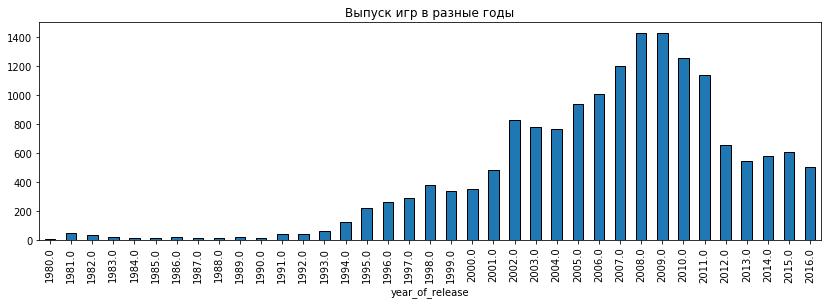

In [28]:
df.groupby('year_of_release')['name'].agg('count').plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Выпуск игр в разные годы',
                                                        ec='black')


Пояснения к графику:
 * на графике явно можно выделить период, так называемого становления самой индустрии компьютерных игр с 1980 по 1990 гг., когда игроков на рынке было немного, а игровая консоль была дорогой покупкой, не говоря уже о персональном компьютере
 * далее следует фаза стремительного роста, связанная с возрастанием интереса к играм , появлением доступных игровых консолей, да и персональный компьютер вошёл практически в каждый дом;
 * пик выпуска игр наблюдается в 2008-2009 гг., а затем следует резкий спад, скорее всего это связано с мировым финансовым кризисом, когда людям не хватает средств к существованию, то первое от чего отказываются это развлечения. Соответственно, есть основание полагать, что постепенно график может восстановиться до прежней амплитуды в 1400 шт.
 * можно также отметить некую цикличность с периодом приблизительно 5 лет, то есть форма графика напоминает перевёрнутую рогами вниз параболу, промодулированную циклоидой. 




Посмотрим, как менялись продажи по платформам.

Text(15.25, 1184.9159999999927, 'Максимум 1247.28 млн. долларов')

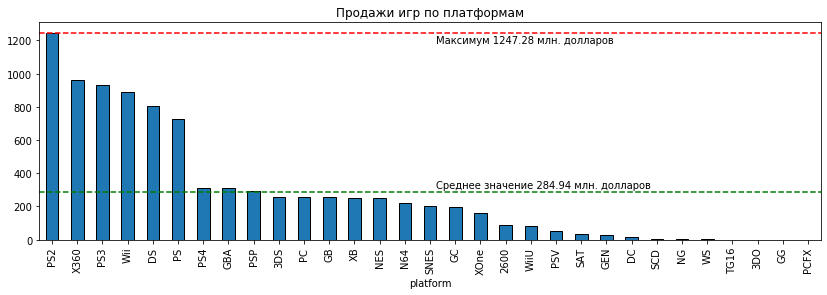

In [29]:
df.groupby('platform')['global_sales'].agg('sum').sort_values(ascending = False).plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Продажи игр по платформам',
                                                        ec='black')
max_x=plt.xlim()[1]
max_y=plt.ylim()[1]
average=df.groupby('platform')['global_sales'].agg('sum').mean()
maximum = df.groupby('platform')['global_sales'].agg('sum').max()
plt.axhline(y=average,
            color='g',
            linestyle='dashed')
plt.axhline(y=maximum,
            color='r',
            linestyle='dashed')
plt.text(x = 0.5*max_x,
         y = 1.1 * average,
         s = 'Среднее значение ' + str(np.round(average, 2)) + ' млн. долларов')
plt.text(x = 0.5*max_x,
         y = 0.95 * maximum,
         s = 'Максимум ' + str(np.round(maximum, 2)) + ' млн. долларов')



Пояснения к графику:
* по объёму продаж выделяется группа из 6 платформ: PS2, X360, PS3, Wii, DS, PS;
* абсолютным лидером по продажам является платформа PS2 с результатом 1255,77 млн. долларов.

In [30]:
df.query('platform== ["PS2"]').groupby(
    ['platform', 'year_of_release'])[
        'global_sales'].agg('sum').reset_index(level=[0,1])

,platform,year_of_release,global_sales
0,PS2,2000.0,39.17
1,PS2,2001.0,166.43
2,PS2,2002.0,205.38
3,PS2,2003.0,185.93
4,PS2,2004.0,220.55
5,PS2,2005.0,160.98
6,PS2,2006.0,106.46
7,PS2,2007.0,75.99
8,PS2,2008.0,53.90
9,PS2,2009.0,26.40


Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

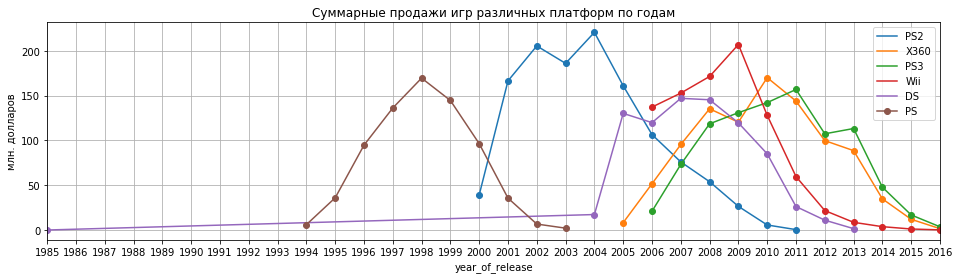

In [31]:
top_platform = ["PS2", "X360", "PS3", "Wii", "DS", "PS"]
x_0 = int(df['year_of_release'].min())
x_end = int(df['year_of_release'].max()+1)
plt.xticks(list(range(x_0,x_end, 1)))
plt.ylabel('млн. долларов')
plt.title('Суммарные продажи игр различных платформ по годам')
life_cycle=[]
for i in top_platform:
    df.query('platform== @i').groupby(
        ['year_of_release'])[
        'global_sales'].agg('sum').plot(style='o-', label = i,
                                        legend=True, figsize=(16,4), grid=True)
    maxim = df.query('platform== @i')['year_of_release'].max()
    minim = df.query('platform== @i')['year_of_release'].min()
    period = maxim-minim
    life_cycle.append(period)

Оценим характерный период присутствия платформы на рынке:

In [32]:
for i in range(len(top_platform)):
    print ('{:<4} {:<4}'.format(top_platform[i],life_cycle[i]), '- лет')
print('Средний срок -', int(np.round((sum(life_cycle) / len(life_cycle)), 0)), 'лет')   

PS2  11.0 - лет
X360 11.0 - лет
PS3  10.0 - лет
Wii  10.0 - лет
DS   28.0 - лет
PS   9.0  - лет
Средний срок - 13 лет


Обращает на себя внимание странная форма графика платформы DS, отличающаяся от типичной формы для всех остальных графиков. Продолжительность существования платформы также сильно выделяется с 1985 по 2013 гг., **целых 28 лет !** , хотя начиная с 2004 г. график выглядит условно нормально. Возможно, имеет место ошибка в данных  year_of_release. 
Из открытых источников известно, что Nintendo DS начала выпускаться с 2004 г. в США и Японии (https://ru.wikipedia.org/wiki/Nintendo_DS) поэтому целесоовразно изменить срок для платформы DS c 28 лет (с 1985 по 2013) на 9 (с 2004 по 2013) и пересчитать средний срок продолжительности присутствия платформы на рынке.

In [33]:
life_cycle[4] = 9

In [34]:
for i in range(len(top_platform)):
    print ('{:<4} {:<4}'.format(top_platform[i],int(life_cycle[i])), '- лет')
print('Средний срок -', int(np.round((sum(life_cycle) / len(life_cycle)), 0)), 'лет')

PS2  11   - лет
X360 11   - лет
PS3  10   - лет
Wii  10   - лет
DS   9    - лет
PS   9    - лет
Средний срок - 10 лет


После коррекции средний срок присутствия(выпуска) платформы на рынке - **10 лет.**

Выберем актуальный период на основании анализа данных которого бедем строить прогноз на 2017 год.

Считаю, что критерии для выбора актуального периода должны быть следующие:
 + период должен быть ограничен справа максимально возможной датой, то есть, как можно ближе к году на который требуется сделать прогноз;
 + период должен включать в себя максимальное количество самых коммерчески успешных платформ, присутствующих на рынке одновременно;
 + при выборе актуального периода необходимо учитывать уровень технологического развития, т.е. факторы, кардинально влияющие на индустрию.

**По сумме факторов наиболее подходящим является период с 2005 по 2016 гг.**



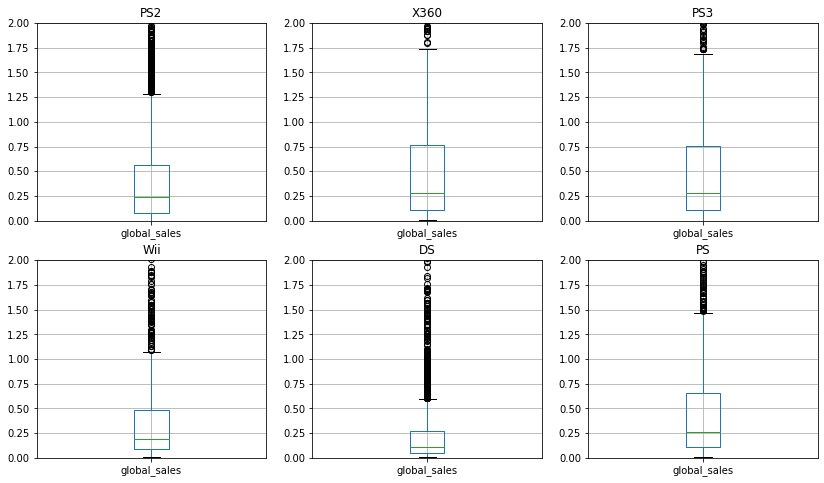

In [35]:
column_list1=["PS2", "X360", "PS3", "Wii", "DS", "PS"]
fig, ax = plt.subplots(nrows=2, ncols=3, figsize = (14,8))
fig.subplots_adjust(wspace=0.2, hspace = 0.2)
for i in range(len(column_list1)):
    df_1 = df[df['platform']==column_list1[i]]['global_sales']
    df_1.plot(kind='box',  ax =ax[i//3, (i)%3], ylim=[0,2], title=column_list1[i], grid=True);
plt.show()

In [36]:
df_top_platf=df.query('platform==["PS2", "X360", "PS3", "Wii", "DS", "PS"]')

In [37]:
df_top_platf_grouped=df_top_platf.groupby('platform')['global_sales'].agg(['mean','median','max', 'min'])

In [38]:
df_top_platf_grouped['diff']=df_top_platf_grouped['mean']-df_top_platf_grouped['median']

In [39]:
df_top_platf_grouped

,mean,median,max,min,diff
platform,,,,,
DS,0.378318,0.110,29.80,0.01,0.268318
PS,0.611412,0.260,10.95,0.01,0.351412
PS2,0.584480,0.235,20.81,0.00,0.349480
PS3,0.713124,0.280,21.05,0.00,0.433124
Wii,0.692986,0.190,82.54,0.01,0.502986
X360,0.779011,0.280,21.82,0.01,0.499011


По всем платформам наблюдается смещение медианы относительно среднего значения, а именно медиана значительно меньше среднего. По медиане и среднему значению лидируют X360 и PS3. 
Граница за которой располагаются выбросы у этих платформ значительно выше чем у других, при том, что выбросы в нашем случае это очень удачные продажи. Например, то что для платформы DS является выбросом т.е. находится выше границы, для платформ X360 и PS3 находится в границах "ящика". т.е. не является чем то необычным. 

In [40]:
df_top_platf_fr2005 = df.query(
    'platform==["PS2", "X360", "PS3", "Wii", "DS", "PS"] and year_of_release >= 2005')

<font color='green'> Возьмём период от 2012 г. и проанализируем продажи по платформам. Сначала ограничим год. </font>

In [41]:
df_top_platf_fr2012=df.query('year_of_release >= 2012')

Text(5.25, 298.4329999999991, 'Максимум 314.14 млн. долларов')

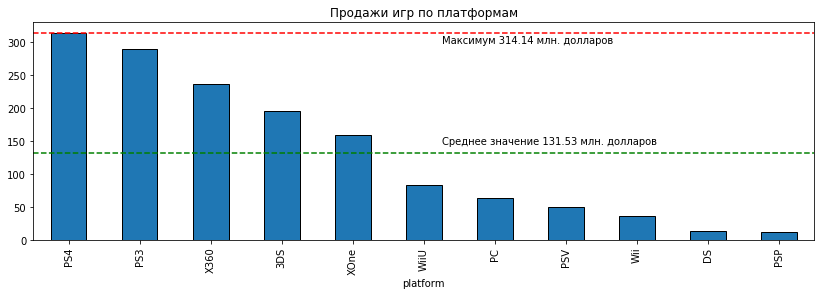

In [42]:
df_top_platf_fr2012.groupby('platform')['global_sales'].agg('sum').sort_values(ascending = False).plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Продажи игр по платформам',
                                                        ec='black')
max_x=plt.xlim()[1]
max_y=plt.ylim()[1]
average=df_top_platf_fr2012.groupby('platform')['global_sales'].agg('sum').mean()
maximum = df_top_platf_fr2012.groupby('platform')['global_sales'].agg('sum').max()
plt.axhline(y=average,
            color='g',
            linestyle='dashed')
plt.axhline(y=maximum,
            color='r',
            linestyle='dashed')
plt.text(x = 0.5*max_x,
         y = 1.1 * average,
         s = 'Среднее значение ' + str(np.round(average, 2)) + ' млн. долларов')
plt.text(x = 0.5*max_x,
         y = 0.95 * maximum,
         s = 'Максимум ' + str(np.round(maximum, 2)) + ' млн. долларов')



<font color='green'> Проанализировав график, определим список наиболее "сильных" платформ:
 1. PS4
 2. PS3
 3. X360
 4. 3DS
 5. XOne

Оценим их продажи на временной шкале и сделаем срез по платформам </font>

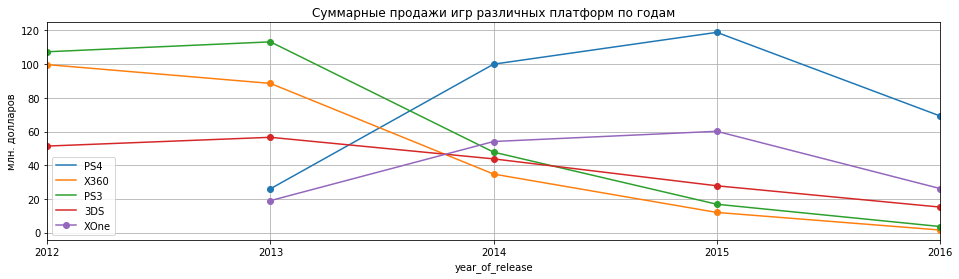

In [43]:
top_platform2 = ["PS4", "X360", "PS3", "3DS", "XOne"]
x_0 = int(df_top_platf_fr2012['year_of_release'].min())
x_end = int(df_top_platf_fr2012['year_of_release'].max()+1)
plt.xticks(list(range(x_0,x_end, 1)))
plt.ylabel('млн. долларов')
plt.title('Суммарные продажи игр различных платформ по годам')
life_cycle=[]
for i in top_platform2:
    df_top_platf_fr2012.query('platform== @i').groupby(
        ['year_of_release'])[
        'global_sales'].agg('sum').plot(style='o-', label = i,
                                        legend=True, figsize=(16,4), grid=True)

<font color='green'>В срезе присутствуют две относительно "молодые" платформы, доминирующая по продажам PS4, принимает лавры от уходящей PS3, график продаж которой падает и ровестница PS4 платформа XOne - следующее поколение XBOX так же набирает обороты взамен предыдущему со спадающим графиком продаж. Таким образом, 2 платформы выходят на новый виток пик которого как раз будет приходится на прогнозируемый год. </font>

In [44]:
df_top_platf_fr2012=df_top_platf_fr2012.query(
    'platform == ["PS4", "X360", "PS3", "3DS", "XOne"]')

Определим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого будем использовать срез по <font color='green'>исследуемому</font> периоду с 2005 г.

Для лучшей наглядности создадим функцию, строющую диаграмму с возможностью отображения аппроксимирующих кривых *n* -ой степени.

In [45]:
def trend_plot(abs_list, ord_list, size, kind, power, title, x_text,y_text ):
    powers=[]
    for i in power:
            powers.append(i)
    X=abs_list
    Y=ord_list
    fig, ax = plt.subplots(figsize=size)
    if kind == 'bar':        
        ax.bar(X, Y, alpha=0.5, ec='black')
        x = np.linspace(np.amin(X), np.amax(X), 300)
        for k in powers:
            p = np.polyfit(X, Y, deg=k)
            ax.plot(x, np.polyval(p, x), lw=2, label='Степень многочлена {} '.format(k))
    elif kind == 'scatter':
        ax.scatter(X, Y, alpha=0.5, ec='black')
        x = np.linspace(np.amin(X), np.amax(X), 300)
        for k in powers:
            p = np.polyfit(X, Y, deg=k)
            ax.plot(x, np.polyval(p, x), lw=2, label='Степень многочлена {} '.format(k))
    ax.legend(loc=0)
    ax.set_title(title)
    plt.ylabel(y_text)
    plt.xlabel(x_text)

Для примера возьмём одну из популярных платформ X360 и построим диаграмму рассеяния.

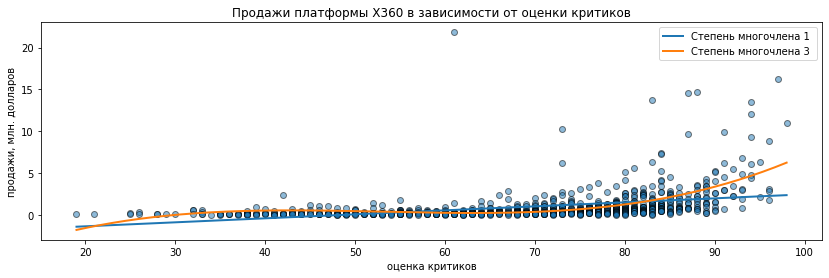

In [46]:
trend_plot(list(df_top_platf_fr2005.query(
    'platform == "X360" and critic_score.isnull()== False')['critic_score']),
           list(df_top_platf_fr2005.query(
    'platform == "X360" and critic_score.isnull()== False')['global_sales']),
           (14, 4), 'scatter', [1,3],
           'Продажи платформы X360 в зависимости от оценки критиков',
           'оценка критиков', 'продажи, млн. долларов')

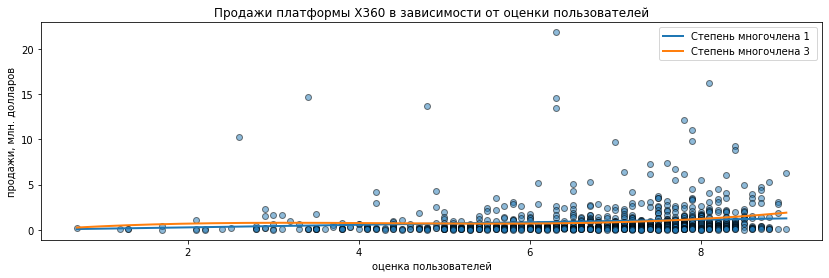

In [47]:
trend_plot(list(df_top_platf_fr2005.query(
    'platform == "X360" and user_score.isnull()== False')['user_score']),
           list(df_top_platf_fr2005.query(
    'platform == "X360" and user_score.isnull()== False')['global_sales']),
           (14, 4), 'scatter', [1,3],
           'Продажи платформы X360 в зависимости от оценки пользователей',
           'оценка пользователей', 'продажи, млн. долларов')

Из графиков однозначно прослеживается зависимость коммерческого успеха от оценок критиков и пользователей. Хотя оценки пользователей более хаотичны, и напротив критики стабильнее. Видимо, пользователи голосуют больше **эмоционально** , а критики **профессионально**.

<font color='green'>Проведём предыдущее исследование для данных из нового актуального периода на основе лидера - платформы PS4.</font>

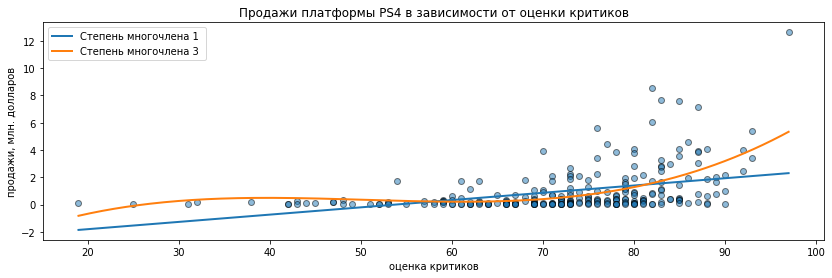

In [48]:
trend_plot(list(df_top_platf_fr2012.query('platform == "PS4" and critic_score.isnull()== False')['critic_score']),
           list(df_top_platf_fr2012.query(
    'platform == "PS4" and critic_score.isnull()== False')['global_sales']),
           (14, 4), 'scatter', [1,3],
           'Продажи платформы PS4 в зависимости от оценки критиков',
           'оценка критиков', 'продажи, млн. долларов')

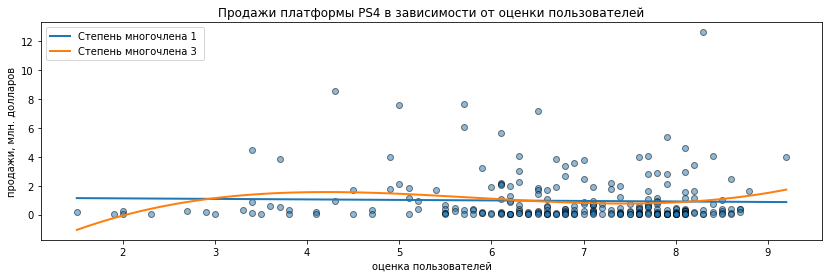

In [49]:
trend_plot(list(df_top_platf_fr2012.query('platform == "PS4" and user_score.isnull()== False')['user_score']),
           list(df_top_platf_fr2012.query(
    'platform == "PS4" and user_score.isnull()== False')['global_sales']),
           (14, 4), 'scatter', [1,3],
           'Продажи платформы PS4 в зависимости от оценки пользователей',
           'оценка пользователей', 'продажи, млн. долларов')

Посчитаем корреляцию между отзывами и продажами.

In [50]:
print('Корреляция между продажами и оценками пользователей составляет: ', np.round(df_top_platf_fr2005['user_score'].corr(df_top_platf_fr2005['global_sales']),2))
print('Корреляция между продажами и оценками пользователей составляет: ', np.round(df_top_platf_fr2005['critic_score'].corr(df_top_platf_fr2005['global_sales']),2))

Корреляция между продажами и оценками пользователей составляет:  0.1
Корреляция между продажами и оценками пользователей составляет:  0.26


In [51]:
print('Корреляция между продажами и оценками пользователей составляет: ', np.round(df_top_platf_fr2012['user_score'].corr(df_top_platf_fr2012['global_sales']),3))
print('Корреляция между продажами и оценками пользователей составляет: ', np.round(df_top_platf_fr2012['critic_score'].corr(df_top_platf_fr2012['global_sales']),3))

Корреляция между продажами и оценками пользователей составляет:  0.002
Корреляция между продажами и оценками пользователей составляет:  0.357


<font color='green'> По исследуемому периоду от 2005 г.: </font>

Взаимосвязь между величинами в обоих случаях очень слабая, но в случае с критиками она почти в 3 раза сильнее. Предполагаю, что критики дают свои оценки, исходя из каких-то правил и принятых критериев, они делают своего рода прогноз на основе своего опыта и по системе, поэтому их оценка оказывается ближе к реальности.

<font color='green'> По актуальному периоду от 2012 г.:

Так же как и у периода от 2005 года взаимосвязь между величинами в обоих случаях очень слабая, но в случае с критиками она гораздо сильнее.
</font>

In [52]:
platforms_from2005 = list(df_top_platf_fr2005['platform'].value_counts().index)

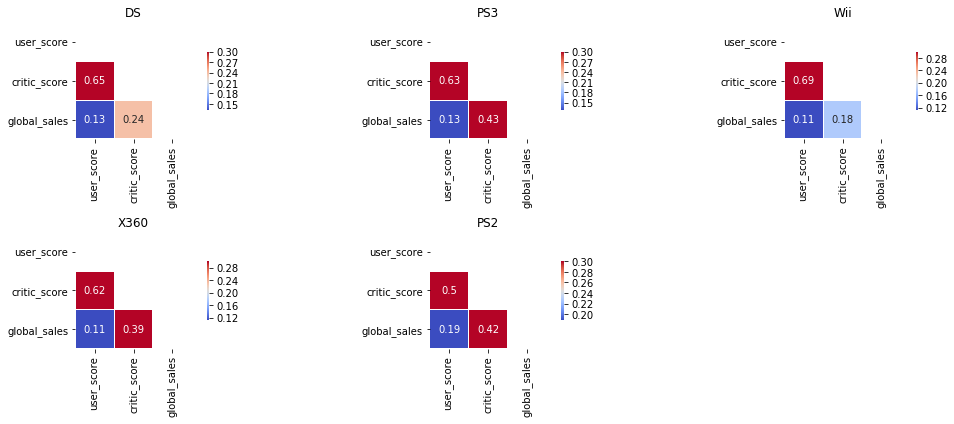

In [53]:
fig =plt.figure(figsize=(18,6))
fig.subplots_adjust(wspace=0.2, hspace = 0.8)
pos = 0
for el in platforms_from2005:
    pos += 1
    axplot = fig.add_subplot(2,3,pos, adjustable='box', aspect=0.3)
    corr1 = df_top_platf_fr2005.query(
        'platform == @el')[[
        'user_score','critic_score','global_sales']].corr()
    mask = np.zeros_like(corr1, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap='coolwarm'
    sns.heatmap(corr1, mask=mask, cmap=cmap, vmax=.3,
                square=True,robust=True, 
                linewidths=.2, ax=axplot,
                annot=True,
                cbar_kws={"shrink": .5})
    axplot.set_title(el)
    

In [54]:
platforms_from2012 = list(df_top_platf_fr2012['platform'].value_counts().index)

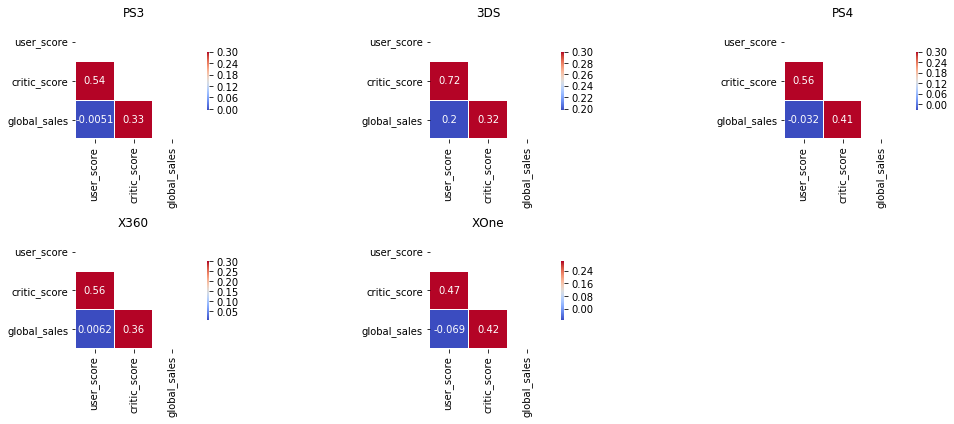

In [55]:
fig =plt.figure(figsize=(18,6))
fig.subplots_adjust(wspace=0.2, hspace = 0.8)
pos = 0
for el in platforms_from2012:
    pos += 1
    axplot = fig.add_subplot(2,3,pos, adjustable='box', aspect=0.3)
    corr2 = df_top_platf_fr2012.query(
        'platform == @el')[[
        'user_score','critic_score','global_sales']].corr()
    mask = np.zeros_like(corr2, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    cmap='coolwarm'
    sns.heatmap(corr2, mask=mask, cmap=cmap, vmax=.3,
                square=True,robust=True, 
                linewidths=.2, ax=axplot,
                annot=True,
                cbar_kws={"shrink": .5})
    axplot.set_title(el)

In [56]:
corr1

,user_score,critic_score,global_sales
user_score,1.000000,0.499577,0.189645
critic_score,0.499577,1.000000,0.424479
global_sales,0.189645,0.424479,1.000000


In [57]:
corr2

,user_score,critic_score,global_sales
user_score,1.000000,0.472462,-0.068925
critic_score,0.472462,1.000000,0.416998
global_sales,-0.068925,0.416998,1.000000


По всем платформам наболюдается похожая картина, взаимосвязь продаж с оценками критиков в несколько раз сильнее, чем с оценками пользователей. Исключения только у платформ Wii и DS.



<font color='green'> По периоду от 2012 года картина схожая с периодом от 2005 года. Обращает на себя внимание отрицтельная корреляция продаж и оценок пользователей, что лишний раз показывает достоверность информации от  критиков. </font>

<font color='green'> Исправим упущение по ящикам с усами и построим их по новому списку платформ актуального периода</font>



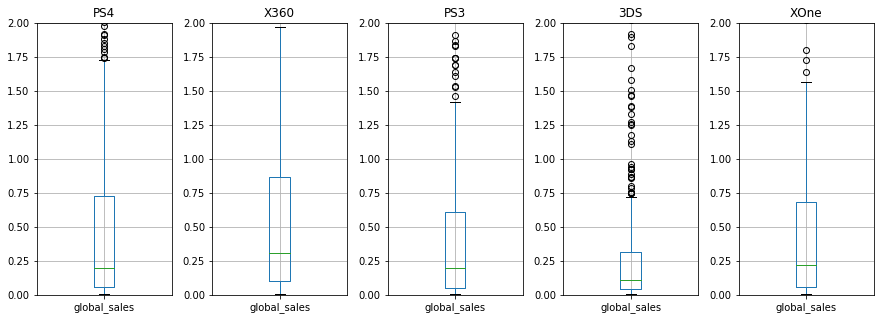

In [58]:
column_list2=["PS4", "X360", "PS3", "3DS", "XOne"]
fig, ax = plt.subplots(nrows=1, ncols=5, figsize = (15,5))
fig.subplots_adjust(wspace=0.3, hspace = 0.2)
for i in range(len(column_list2)):
    df_1 = df_top_platf_fr2012[df_top_platf_fr2012['platform']==column_list2[i]]['global_sales']
    df_1.plot(kind='box',  ax =ax[i], ylim=[0,2], title=column_list2[i], grid=True);
plt.show()

In [59]:
df_top_platf_fr2012.groupby('platform')['global_sales'].agg(['mean','median','max', 'min'])

,mean,median,max,min
platform,,,,
3DS,0.491439,0.11,14.60,0.01
PS3,0.585781,0.20,21.05,0.01
PS4,0.801378,0.20,14.63,0.01
X360,0.810068,0.31,16.27,0.01
XOne,0.645020,0.22,7.39,0.01


<font color='green'>По всем платформам наблюдается смещение медианы относительно среднего значения, а именно медиана  меньше. По медиане и среднему в лидерах X360 у неё же самый большой размах и порог аномалий. По среднему значению за игру PS4 на втором месте, а XOne на третьем, порог выбросов меньше чем у X360.   </font>

Посмотрим на общее распределение игр по жанрам.

Сначала взглянем на общую картину

Text(5.75, 807.1579999999954, 'Максимум 849.64 млн. долларов')

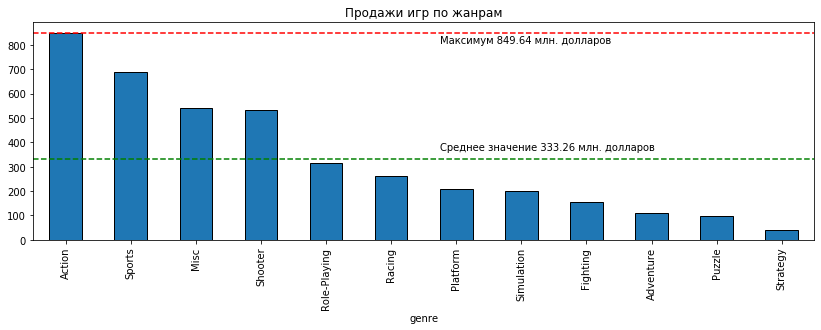

In [60]:
df_top_platf_fr2005.groupby('genre')['global_sales'].agg('sum').sort_values(ascending = False).plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Продажи игр по жанрам',
                                                        ec='black')
max_x=plt.xlim()[1]
max_y=plt.ylim()[1]
average=df_top_platf_fr2005.groupby('genre')['global_sales'].agg('sum').mean()
maximum = df_top_platf_fr2005.groupby('genre')['global_sales'].agg('sum').max()
plt.axhline(y=average,
            color='g',
            linestyle='dashed')
plt.axhline(y=maximum,
            color='r',
            linestyle='dashed')
plt.text(x = 0.5*max_x,
         y = 1.1 * average,
         s = 'Среднее значение ' + str(np.round(average, 2)) + ' млн. долларов')
plt.text(x = 0.5*max_x,
         y = 0.95 * maximum,
         s = 'Максимум ' + str(np.round(maximum, 2)) + ' млн. долларов')

Теперь оценим распределение по средним значениям

Text(5.75, 0.9865127201565533, 'Максимум 1.04 млн. долларов')

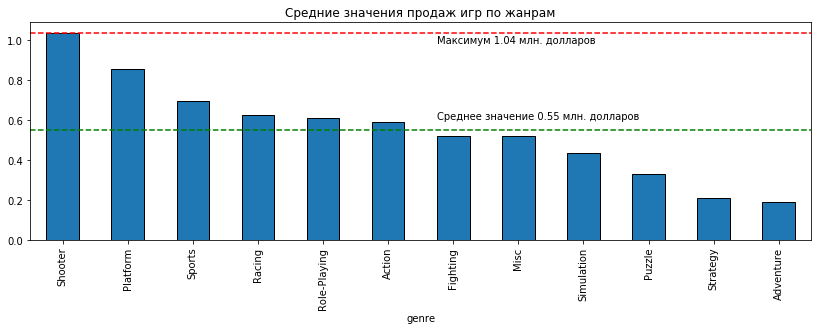

In [61]:
df_top_platf_fr2005.groupby('genre')['global_sales'].agg('mean').sort_values(ascending = False).plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Средние значения продаж игр по жанрам',
                                                        ec='black')
max_x=plt.xlim()[1]
max_y=plt.ylim()[1]
average=df_top_platf_fr2005.groupby('genre')['global_sales'].agg('mean').mean()
maximum = df_top_platf_fr2005.groupby('genre')['global_sales'].agg('mean').max()
plt.axhline(y=average,
            color='g',
            linestyle='dashed')
plt.axhline(y=maximum,
            color='r',
            linestyle='dashed')
plt.text(x = 0.5*max_x,
         y = 1.1 * average,
         s = 'Среднее значение ' + str(np.round(average, 2)) + ' млн. долларов')
plt.text(x = 0.5*max_x,
         y = 0.95 * maximum,
         s = 'Максимум ' + str(np.round(maximum, 2)) + ' млн. долларов')

In [62]:
df_top_platf_fr2005.groupby('genre')['global_sales'].agg(['sum', 'count','mean'])

,sum,count,mean
genre,,,
Action,849.64,1443,0.588801
Adventure,111.69,587,0.190273
Fighting,154.77,297,0.521111
Misc,541.78,1040,0.520942
Platform,207.88,243,0.855473
Puzzle,96.97,296,0.327601
Racing,259.97,417,0.623429
Role-Playing,316.37,518,0.610753
Shooter,530.64,511,1.038434


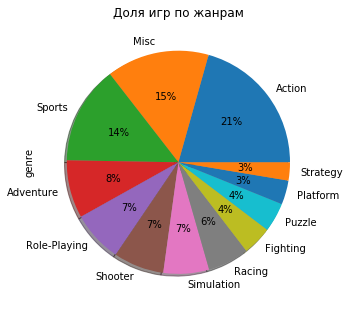

In [63]:
df_top_platf_fr2005['genre'].value_counts().plot(kind='pie',
                                    autopct='%1.0f%%',
                                    figsize=(5,6),
                                    shadow = True,title = 'Доля игр по жанрам')

Жанр Action - самый многочисленный и за счет этого лидирует по общему количеству продаж, хотя среднее количество прибыли на одну игру у него меньше, чем у ряда других жанров. В этом плане игры в жанрах Shooter и Sports выглядят предпочтительней, у них неплохое соотношение результатов по количеству продаж и средней выручке за одну игру. Жанры Puzzle, Strategy и Adventure, имеют наихудшие показатели по обоим параметрам.



<font color='green'> Полагаю, что жанры они вне времени или по крайней мере их колебания не так сильно выражены во времени. Но для полноты картины построим диаграмму</font>

Text(5.75, 357.4374999999982, 'Максимум 376.25 млн. долларов')

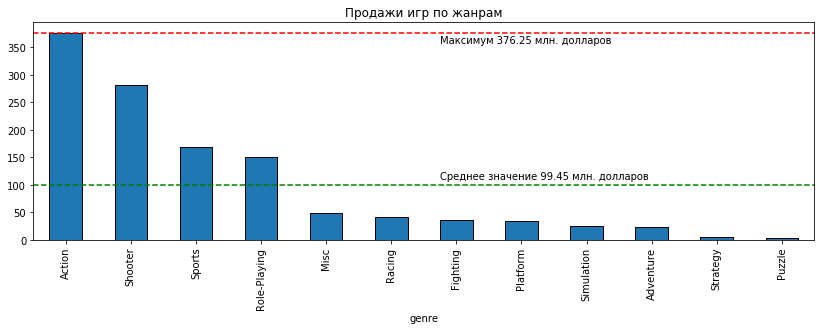

In [64]:
df_top_platf_fr2012.groupby('genre')['global_sales'].agg('sum').sort_values(ascending = False).plot(kind='bar',
                                                        figsize=(14,4),
                                                        title='Продажи игр по жанрам',
                                                        ec='black')
max_x=plt.xlim()[1]
max_y=plt.ylim()[1]
average=df_top_platf_fr2012.groupby('genre')['global_sales'].agg('sum').mean()
maximum = df_top_platf_fr2012.groupby('genre')['global_sales'].agg('sum').max()
plt.axhline(y=average,
            color='g',
            linestyle='dashed')
plt.axhline(y=maximum,
            color='r',
            linestyle='dashed')
plt.text(x = 0.5*max_x,
         y = 1.1 * average,
         s = 'Среднее значение ' + str(np.round(average, 2)) + ' млн. долларов')
plt.text(x = 0.5*max_x,
         y = 0.95 * maximum,
         s = 'Максимум ' + str(np.round(maximum, 2)) + ' млн. долларов')

<font color='green'> Лидер остался прежним  - жанр Action. Shooter укрепил позиции потеснив sports. Тройка замыкающих осталась прежней, только места у жанров поменялись. </font>

## Вывод
1. В целом, исходя из данных, можно выделить несколько периодов индустрии компьютерных игр:
 * период так называемого становления с 1980 по 1990 гг., когда игроков на рынке было немного, а игровая консоль была дорогой покупкой, не говоря уже о персональном компьютере
 * стремительный рост, связанный с возрастанием интереса к играм , появлением доступных игровых консолей, персональных компьютеров;
 * пик в 2008-2009 гг., 
 * резкий спад, скорее всего это связано с мировым финансовым кризисом, когда людям не хватает средств к существованию, то первое от чего отказываются это развлечения. 

Соответственно, есть основание полагать, что постепенно график может восстановиться до прежней амплитуды в 1400 шт.
Можно также отметить некую цикличность с периодом приблизительно 5 лет, то есть форма графика напоминает перевёрнутую рогами вниз параболу, промодулированную циклоидой. 

2. По объёму продаж выделяется группа из 6 платформ: PS2, X360, PS3, Wii, DS, PS,а абсолютным лидером по продажам является платформа PS2 с результатом 1255,77 млн. долларов.

3. Средний срок присутствия(выпуска) платформы на рынке - 10 лет.

4. Актуальным периодом для построения прогноза на 2017  был выбран отрезок с 2005 по 2016 гг. по следующим критериям:
 * период должен быть ограничен справа максимально возможной датой, то есть, как можно ближе к году на который требуется сделать прогноз;
 * период должен включать в себя максимальное количество самых коммерчески успешных платформ, присутствующих на рынке одновременно;
 * при выборе актуального периода необходимо учитывать уровень технологического развития, т.е. факторы, кардинально влияющие на индустрию.

5. Анализ показал наличие зависимости коммерческого успеха от оценок критиков и пользователей. 

6. Жанр Action - самый многочисленный и за счет этого лидирует по общему количеству продаж, хотя среднее количество прибыли на одну игру у него меньше, чем у ряда других жанров. В этом плане игры в жанрах Shooter и Sports выглядят предпочтительней, у них неплохое соотношение результатов по количеству продаж и средней выручке за одну игру. Жанры Puzzle, Strategy и Adventure, имеют наихудшие показатели по обоим параметрам.


## Шаг 4. Составление портрета пользователя каждого региона

Портрет пользователя каждого региона составим на основании предпочтений, которые оценим по следующим критериям:
 + популярность платформ;
 + популярность жанров;
 + влияние рейтингов ESRB.

In [65]:
region_sales=['na_sales','eu_sales','jp_sales']


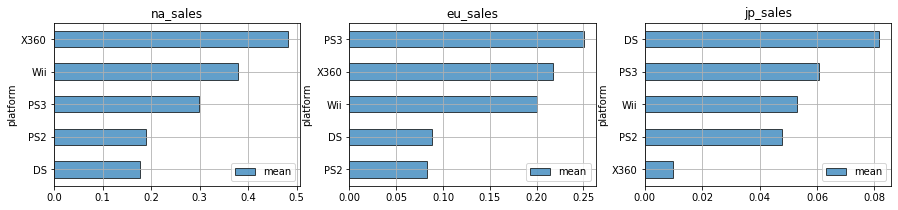

In [66]:
fig, ax = plt.subplots(1, 3, figsize = (15,3))
fig.subplots_adjust(wspace=0.2, hspace = 0.2)
for i in range(len(region_sales)):
    df_top_platf_fr2005.groupby('platform')[region_sales[i]].agg(['mean']).sort_values('mean').plot(
            kind='barh',  ax =ax[i], grid=True, ec='black', alpha=0.7, title=region_sales[i])
plt.show()  


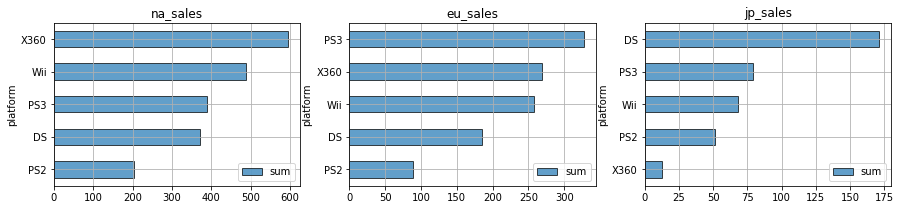

In [67]:
fig, ax = plt.subplots(1, 3, figsize = (15,3))
fig.subplots_adjust(wspace=0.2, hspace = 0.2)
for i in range(len(region_sales)):
    df_top_platf_fr2005.groupby('platform')[region_sales[i]].agg(['sum']).sort_values('sum').plot(
            kind='barh',  ax =ax[i], grid=True, ec='black', alpha=0.7, title=region_sales[i])
plt.show() 

In [68]:
df_top_platf_fr2005.groupby('platform')['na_sales','eu_sales','jp_sales'].agg(['mean','sum'])

na_sales          eu_sales          jp_sales        
              mean     sum      mean     sum      mean     sum
platform                                                      
DS        0.177307  371.99  0.087931  184.48  0.081673  171.35
PS2       0.189345  202.22  0.082659   88.28  0.047772   51.02
PS3       0.298721  390.13  0.250544  327.21  0.060804   79.41
Wii       0.378593  486.87  0.200871  258.32  0.053095   68.28
X360      0.482771  595.74  0.217480  268.37  0.009968   12.30

Вывод по результатам анализа платформ по различным регионам.
<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpFirst align=center style='margin-bottom:0cm;margin-bottom:
  .0001pt;mso-add-space:auto;text-align:center;line-height:normal;tab-stops:
  45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>platform<o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>na_sales</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'>Комментарий<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>mean<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>X360<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>0,482771<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>Лидирует </span><span lang=EN-US style='font-size:
  10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  color:black;mso-themecolor:text1;mso-ansi-language:EN-US;mso-fareast-language:
  RU'>X</span><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>360, немного хуже </span><span lang=EN-US
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-ansi-language:EN-US;
  mso-fareast-language:RU'>Wii</span><span style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:black;
  mso-themecolor:text1;mso-fareast-language:RU'>. </span><span lang=EN-US
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-ansi-language:EN-US;
  mso-fareast-language:RU'>DS </span><span style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:black;
  mso-themecolor:text1;mso-fareast-language:RU'>проигрывает всем.<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>Wii<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>0,378593<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>PS3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>0,298721<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>PS2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>0,189345<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>DS<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>0,177307<o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>platform<o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>na_sales</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>Комментарий</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>sum<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>X360<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>595,74<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>Во главе те же, что и в случае среднего значения, а
  вот аутсайдер поменялся на </span><span lang=EN-US style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  color:black;mso-themecolor:text1;mso-ansi-language:EN-US;mso-fareast-language:
  RU'>PS</span><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>2.Всё из-за того, что в рассматриваемом промежутке
  от 2005 г. </span><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>PS</span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-fareast-language:RU'>2
  уже преодолела пик популярности.<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>Wii<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>486,87<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>PS3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>390,13<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>DS<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>371,99<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>PS2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>202,22<o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>platform<o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>eu_sales</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>Комментарий</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>mean<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:red;mso-fareast-language:
  RU'>PS3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:red;mso-fareast-language:
  RU'>0,250544<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>В Европе лидер отличается <span class=GramE>от</span>
  <span class=GramE>ранка</span> Северной Америки. Тут доминирует </span><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>PS3</span><span lang=EN-US
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-fareast-language:RU'> </span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>X</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'>360<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,217480<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>Wii</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,200871<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>DS</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,087931<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>PS</span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:#0070C0;mso-fareast-language:RU'>2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-fareast-language:
  RU'>0,082659<o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>platform</span></b></span><b
  style='mso-bidi-font-weight:normal'><span style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>eu</span></b></span><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'>_</span></b><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>sales</span></b><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'>Комментарий<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>sum</span></b></span><b
  style='mso-bidi-font-weight:normal'><span style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:red;mso-fareast-language:
  RU'>PS3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:red;mso-fareast-language:
  RU'>327,21<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>Всё аналогично ситуации со средним.<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>X360<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>268,37<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'>Wii</span></span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>258,32<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>DS<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>184,48<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>PS2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>88,28<o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>platform<o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>jp_sales</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>Комментарий</span></b></span><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>mean<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>DS<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>0,081673<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>Говорят, что Япония это как отдельная планета. Тут
  совсем всё <span class=GramE>по другому</span>. </span><span lang=EN-US
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-ansi-language:EN-US;
  mso-fareast-language:RU'>Nintendo</span><span lang=EN-US style='font-size:
  10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  color:black;mso-themecolor:text1;mso-fareast-language:RU'> </span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:black;mso-themecolor:text1;mso-fareast-language:RU'>исконно
  японская компания и видимо больше ориентирована на внутреннего потребителя.<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>PS</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'>3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,060804<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>Wii</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,053095<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";mso-ansi-language:
  EN-US;mso-fareast-language:RU'>PS</span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'>2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>0,047772<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:#0070C0;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>X</span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:#0070C0;mso-fareast-language:RU'>360<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-fareast-language:
  RU'>0,009968<o:p></o:p></span></p>
  </td>
 </tr>
</table>

<p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>

<table class=MsoTableGrid border=1 cellspacing=0 cellpadding=0
 style='border-collapse:collapse;border:none;mso-border-alt:solid windowtext .5pt;
 mso-yfti-tbllook:1184;mso-padding-alt:0cm 5.4pt 0cm 5.4pt'>
 <tr style='mso-yfti-irow:0;mso-yfti-firstrow:yes'>
  <td width=102 rowspan=3 style='width:58.85pt;border:solid windowtext 1.0pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>platform</span></b><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'><o:p></o:p></span></b></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>jp</span></b></span><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'>_</span></b><b style='mso-bidi-font-weight:
  normal'><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>sales</span></b><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'><o:p></o:p></span></b></p>
  </td>
  <td width=409 rowspan=3 style='width:235.3pt;border:solid windowtext 1.0pt;
  border-left:none;mso-border-left-alt:solid windowtext .5pt;mso-border-alt:
  solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'>Комментарий<o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:1'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><b style='mso-bidi-font-weight:normal'><span
  lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-ansi-language:EN-US;mso-fareast-language:
  RU'>sum</span></b><b style='mso-bidi-font-weight:normal'><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";mso-fareast-language:RU'><o:p></o:p></span></b></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:2'>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'><o:p>&nbsp;</o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:3'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>DS</span><span
  style='font-size:10.0pt;font-family:"Arial","sans-serif";mso-fareast-font-family:
  "Times New Roman";color:red;mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span lang=EN-US style='font-size:10.0pt;font-family:
  "Arial","sans-serif";mso-fareast-font-family:"Times New Roman";color:red;
  mso-ansi-language:EN-US;mso-fareast-language:RU'>171,35<o:p></o:p></span></p>
  </td>
  <td width=409 rowspan=5 valign=top style='width:235.3pt;border-top:none;
  border-left:none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;text-align:justify;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:black;mso-themecolor:text1;
  mso-fareast-language:RU'>Поразительно, что столь популярная платформа Х360
  именно в Японии имеет слабые позиции<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:4'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>PS3<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>79,41<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:5'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span class=SpellE><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'>Wii</span></span><span style='font-size:10.0pt;
  font-family:"Arial","sans-serif";mso-fareast-font-family:"Times New Roman";
  mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>68,28<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:6'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>PS2<o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";mso-fareast-language:RU'>51,02<o:p></o:p></span></p>
  </td>
 </tr>
 <tr style='mso-yfti-irow:7;mso-yfti-lastrow:yes'>
  <td width=102 valign=top style='width:58.85pt;border:solid windowtext 1.0pt;
  border-top:none;mso-border-top-alt:solid windowtext .5pt;mso-border-alt:solid windowtext .5pt;
  padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle style='margin-bottom:0cm;margin-bottom:.0001pt;
  mso-add-space:auto;line-height:normal;tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-fareast-language:
  RU'>X360</span><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
  <td width=116 valign=top style='width:67.05pt;border-top:none;border-left:
  none;border-bottom:solid windowtext 1.0pt;border-right:solid windowtext 1.0pt;
  mso-border-top-alt:solid windowtext .5pt;mso-border-left-alt:solid windowtext .5pt;
  mso-border-alt:solid windowtext .5pt;padding:0cm 5.4pt 0cm 5.4pt'>
  <p class=MsoNormalCxSpMiddle align=center style='margin-bottom:0cm;
  margin-bottom:.0001pt;mso-add-space:auto;text-align:center;line-height:normal;
  tab-stops:45.8pt 91.6pt 137.4pt 183.2pt 229.0pt 274.8pt 320.6pt 366.4pt 412.2pt 458.0pt 503.8pt 549.6pt 595.4pt 641.2pt 687.0pt 732.8pt;
  mso-mirror-indents:yes'><span style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-fareast-language:
  RU'>12,30</span><span lang=EN-US style='font-size:10.0pt;font-family:"Arial","sans-serif";
  mso-fareast-font-family:"Times New Roman";color:#0070C0;mso-ansi-language:
  EN-US;mso-fareast-language:RU'><o:p></o:p></span></p>
  </td>
 </tr>
</table>

Проанализируем влияние жанров.

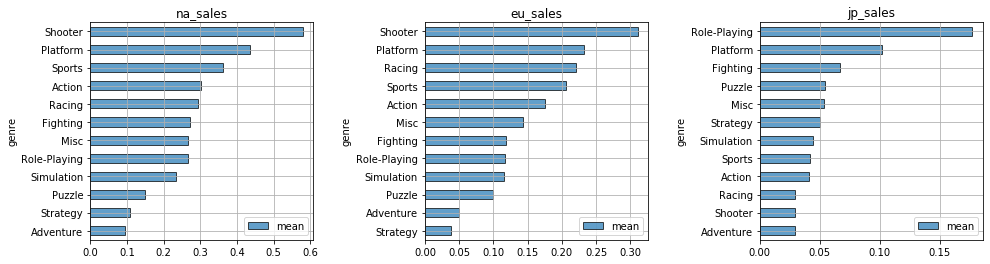

In [69]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(wspace=0.5, hspace = 0.2)
for i in range(len(region_sales)):
    df_top_platf_fr2005.groupby(
        'genre')[region_sales[i]].agg(['mean']).sort_values('mean').plot(
            kind='barh',  ax =ax[i], grid=True, ec='black', alpha=0.7, title=region_sales[i])
plt.show()

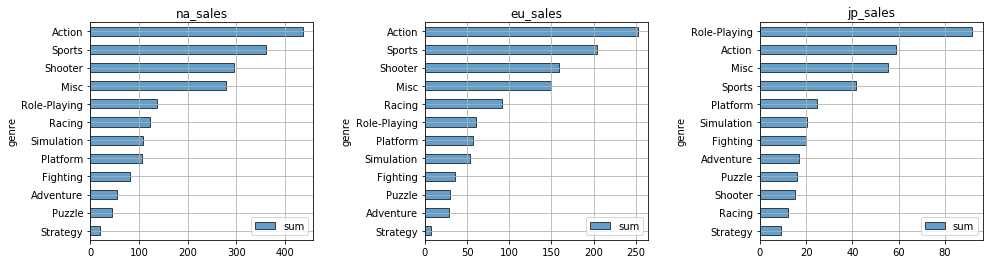

In [70]:
fig, ax = plt.subplots(1, 3, figsize = (16,4))
fig.subplots_adjust(wspace=0.5, hspace = 0.2)
for i in range(len(region_sales)):
    df_top_platf_fr2005.groupby(
        'genre')[region_sales[i]].agg(['sum']).sort_values('sum').plot(
            kind='barh',  ax =ax[i], grid=True, ec='black', alpha=0.7, title=region_sales[i])
plt.show()

Оценим влияние рейтинга ESRB

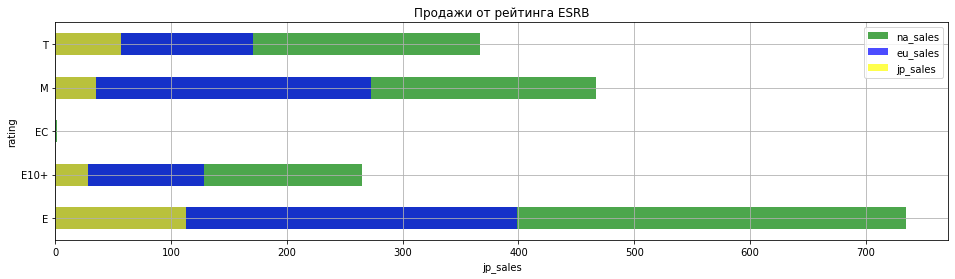

In [71]:
fig, ax = plt.subplots(figsize = (16,4))
fig.subplots_adjust(wspace=0.5, hspace = 0.2)
color = ['green','blue', 'yellow']
for i in range(len(region_sales)):
    plt.xlabel(region_sales[i])
    df_top_platf_fr2005.groupby(
        'rating')[region_sales[i]].agg('sum').plot(kind='barh', grid=True, legend= True, color=color[i],
        alpha=0.7, ax=ax, title='Продажи от рейтинга ESRB')
    

## Вывод
1. С точки зрения предпочтений жанров, Северная Америка и Европа схожи. У обоих регионов в лидерах action и shooter. Немного больше игры жанра sports предпочитают жители стран Северной Америки, зато жители стран Европы чуть больше играют в гонки. Тройка замыкающих - жанры puzzle, adventure и strategy. В Японии другие предпочтения, жанр shooter не популяен, а доминируют ролевые игры, а action на втором месте.
2. По платформам ситуация также сильно отличается у Японии и стран Северной Америки и Европы. В Японии доминирует платформа DS, которая в двух других регионах является аутсайдером.
3. Зависимость продаж по регионам от рейтинга ESRB, определяющего возрастную категорию выглядит следующим образом:
 + категория "Е" - для всех (от 6 лет и старше) превалирует вне зависимости от региона;
 + категория "Е10+" - для всех (от 10 лет и старше) на втором месте у стран Северной Америки и  Европы;
 + категория "ЕC" - для детей младшего возраста (от 3 лет) находится в хвосте, вне зависимости от региона;
 + распределение по другим категориям в странах Северной Америки и Европы не отличается
 + второе место в Японии занимает категория "Т" - подростки (от 13 лет), т.е. увлечение компьютерными играми в Японии начинается раньше.
 


## Шаг 5. Проверка гипотез
- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* (англ. «действие») и *Sports* (англ. «виды спорта») разные.

Пусть нулевая гипотеза:
   * H₀ - «Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые», 

а альтернативная соответственно;
   * H₁ соответственно - «Средние пользовательские рейтинги платформ *Xbox One* и *PC* различаются»

In [72]:
df.query('platform == ["PC", "XOne"] and user_score.notnull()').groupby('platform')['year_of_release'].agg(['min', 'max'])

,min,max
platform,,
PC,1985.0,2016.0
XOne,2013.0,2016.0


Платформа XOne стартовала с 2013 г. в то время как игры на PC появились гораздо раньше и уже имели оценки пользователей. Хотя в задании ничего не сказано про то, за какой период нужно взять данные, считаю что для достижения бОльшего правдоподобия оценки, необходимо уравнять условия для сравниваемых платформ. Поэтому выполним проверку гипотезы в интервале без ограничения по годам и с ограничением слева = 2013 г. и сопоставим результаты.

In [73]:
df_pc_all = df.query('platform == "PC" and user_score.notnull()')
df_xone_all = df.query('platform == "XOne" and user_score.notnull()')
df_pc_from2013 = df_pc_all.query('year_of_release >= 2013')
df_xone_from2013 = df_xone_all.query('year_of_release >= 2013')

In [74]:
p_value=(st.ttest_ind(df_pc_all['user_score'], df_xone_all['user_score'])).pvalue
alpha = 0.05
if p_value < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Отвергаем нулевую гипотезу


In [75]:
results=st.ttest_ind(df_pc_from2013['user_score'], df_xone_from2013['user_score'])
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.16390354211387628
Не получилось отвергнуть нулевую гипотезу


Посмотрим на средние значения.


In [76]:
df_pc_all['user_score'].mean()

7.067857142857142

In [77]:
df_xone_all['user_score'].mean()

6.521428571428572

In [78]:
df_pc_from2013['user_score'].mean()

6.283974358974358

In [79]:
df_xone_from2013['user_score'].mean()

6.521428571428572

Пусть нулевая гипотеза:
   * H₀ - «Средние пользовательские рейтинги жанров Action и Sports одинаковые», 

а альтернативная соответственно;
   * H₁ соответственно - «Средние пользовательские рейтинги жанров Action и Sports разные»

In [80]:
df_action=df.query('genre == "Action" and user_score.notnull()')
df_sports=df.query('genre == "Sports" and user_score.notnull()')

In [81]:
results=st.ttest_ind(df_action['user_score'], df_sports['user_score'])
alpha = 0.05
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.08448041959282035
Не получилось отвергнуть нулевую гипотезу


In [82]:
df_action['user_score'].mean()

7.058931552587646

In [83]:
df_sports['user_score'].mean()

6.959466911764705

## Вывод
1. Для первой гипотезы **результаты получились разные для разных периодов!**
 * В первом случае принимаем альтернативную гипотезу - "Средние пользовательские рейтинги платформ XOne и PC различаются". То есть оценки для PC выше, чем для XOne.
 * Во втором случае несмотря на то, что оценка XOne выше, принимаем нулевую гипотезу - "Средние пользовательские рейтинги платформ XOne и PC одинаковы", так-как с вероятностью более 16% их различие случайно.
2. Вторая гипотеза о том, что оценки пользователей для жанров Action и Sports разные **не подтвердилась.**




## Шаг 6. Общий вывод
Анализ данных показал следующее:
1. Для формирования ассортимента и планирования рекламных кампаний, направленных на продажу компьютерных игр по всему миру следует учитывать следующие факторы:
 * Лидеры по продажам – игры жанров  Action, Shooter и Sports 
 * Предпочтения у жителей разных регионов могут отличаться, например, у стран Северной Америки и Европы в лидерах action и shooter, а в Японии доминируют ролевые игры, и напротив action на втором месте
 * По платформам так же имеются региональные отличия. В странах Северной Америки и Европы по продажам лидируют X360 и PS3, а в Японии DS.
* Взаимосвязь продаж с оценками критиков в несколько раз сильнее, чем с оценками пользователей.
2. Касаемо платформ, следует делать ставку на именитых и хорошо зарекомендовавших себя разработчиков: Microsoft и Sony. В этом ключе, следует обратить внимание на относительно новые платформы XOne и PS4, например. 
3. Следует учитывать временные факторы. Средний срок нахождения платформы на рынке около 10 лет. 
4. Следует учитывать общие экономические факторы. Пик продаж, наблюдавшийся в 2008 – 2009 гг. может указывать на большой потенциал и тенденцию к росту рынка в будущем. 
